<a href="https://colab.research.google.com/github/shuvayan/DigitRecognizer/blob/master/M1_NB_MiniProject_2_Structured_Data_Classification_SD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project Notebook: Structured Data Classification

## Problem Statement

To predict whether a patient has a heart disease.

## Learning Objectives

At the end of the experiment, you will be able to

* Understand the Cleveland Clinic Foundation Heart Disease dataset
* Pre-process this dataset using Keras layers: IntegerLookup, StringLookup & Normalization
* Understand and use Keras concatenate layer
* Build a neural network model and architecture using Keras functional api
* Predict an unseen data

## Introduction

This example demonstrates how to do structured data classification, starting from a raw
CSV file. Our data includes both numerical and categorical features. We will use Keras
preprocessing layers to normalize the numerical features and vectorize the categorical
ones.

Note that this example should be run with TensorFlow 2.5 or higher.

## Dataset

[Our dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) is provided by the
Cleveland Clinic Foundation for Heart Disease.
It's a CSV file with 303 rows. Each row contains information about a patient (a
**sample**), and each column describes an attribute of the patient (a **feature**). We
use the features to predict whether a patient has a heart disease (**binary
classification**).

Here's the description of each feature:
<br><br>

Column| Description| Feature Type
------------|--------------------|----------------------
Age | Age in years | Numerical
Sex | (1 = male; 0 = female) | Categorical
CP | Chest pain type (0, 1, 2, 3, 4) | Categorical
Trestbpd | Resting blood pressure (in mm Hg on admission) | Numerical
Chol | Serum cholesterol in mg/dl | Numerical
FBS | fasting blood sugar in 120 mg/dl (1 = true; 0 = false) | Categorical
RestECG | Resting electrocardiogram results (0, 1, 2) | Categorical
Thalach | Maximum heart rate achieved | Numerical
Exang | Exercise induced angina (1 = yes; 0 = no) | Categorical
Oldpeak | ST depression induced by exercise relative to rest | Numerical
Slope | Slope of the peak exercise ST segment | Numerical
CA | Number of major vessels (0-3) colored by fluoroscopy | Both numerical & categorical
Thal | 3 = normal; 6 = fixed defect; 7 = reversible defect | Categorical
Target | Diagnosis of heart disease (1 = true; 0 = false) | Target

<br><br>

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/heart.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Import Required Packages

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import IntegerLookup     # Used in Feature processing
from tensorflow.keras.layers import Normalization     # Used in Feature processing
from tensorflow.keras.layers import StringLookup      # Used in Feature processing

In [ ]:
print(tf.__version__)

2.15.0


# Part A

## Load the data and create batches [2 Marks]

### Load data into a Pandas dataframe

Hint:: pd.read_csv

In [ ]:
file_url = "/content/heart.csv"
## YOUR CODE HERE
heart_df = pd.read_csv(file_url)

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


Check the shape of the dataset:

In [ ]:
## YOUR CODE HERE
heart_df.shape

(303, 14)

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


Check the preview of a few samples:

Hint:: head()

In [ ]:
## YOUR CODE HERE
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


Draw some inference from the data. What does the target column indicate?

The last column, "target", indicates whether the patient has a heart disease (1) or not
(0).

### Split the data into a training and validation set

Hint:: Use .sample() method from Pandas.

Refer to link [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)

Official reference from pandas for drop method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [ ]:
## YOUR CODE HERE
train_data = heart_df.sample(frac=0.8, random_state=42)

# Select the rows that are not in the training set to create the test set
test_data = heart_df.drop(train_data.index)

# Optionally, reset the index for both train and test datasets
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

## YOUR CODE HERE

print(
    "Using %d samples for training and %d for validation"
    % (len(train_data), len(test_data))
)

Using 242 samples for training and 61 for validation


### Converting into tensorflow dataset & creating batches

Generate `tf.data.Dataset` objects for each dataframe:

Each `Dataset` yields a tuple `(input, target)` where `input` is a dictionary of features
and `target` is the value `0` or `1`:

Refer [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices) to create the tuple using tensorflow.

In [ ]:
def dataframe_to_dataset(dataframe):
    ## YOUR CODE HERE
    dataframe = dataframe.copy()
    # Extract features and targets
    targets = dataframe.pop('target')
    features = dict(dataframe)
    # Convert targets to one-hot encoding
    targets = tf.one_hot(targets, depth=2)
    # Convert features and targets to tf.data.Dataset
    ds = tf.data.Dataset.from_tensor_slices((features, targets))
    return ds

train_ds = dataframe_to_dataset(train_data)
test_ds = dataframe_to_dataset(test_data)

In [ ]:
# Example usage to iterate over the datasets
for input, target in train_ds.take(1):
    print("Input features:", input)
    print("Target:", target)

Input features: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=49>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=118>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=149>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=126>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.8>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'normal'>}
Target: tf.Tensor([1. 0.], shape=(2,), dtype=float32)


In [ ]:
# Visualizing one datapoint from the formatted data
## YOUR CODE HERE

#### Create the batch of the datasets:

Refer [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) to create a batch using tensorflow.

In [ ]:
## YOUR CODE HERE  ## For train
# Define the batch size
BATCH_SIZE = 32

# Create batches from the train dataset
train_batched_dataset = train_ds.batch(BATCH_SIZE)

## YOUR CODE HERE  ## For val
test_batched_dataset = test_ds.batch(BATCH_SIZE)

for i in train_batched_dataset.as_numpy_iterator():
    print(i)
    break


({'age': array([49, 55, 54, 57, 66, 53, 53, 39, 50, 59, 56, 67, 44, 54, 70, 65, 56,
       67, 48, 54, 45, 41, 51, 50, 59, 60, 71, 65, 58, 46, 51, 52]), 'sex': array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1]), 'cp': array([3, 4, 3, 2, 4, 4, 4, 3, 3, 4, 2, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 1, 4, 2, 1, 4, 2, 4, 2]), 'trestbps': array([118, 128, 110, 130, 120, 140, 142, 138, 140, 135, 120, 115, 110,
       110, 160, 160, 132, 120, 122, 150, 142, 110, 130, 120, 160, 150,
       160, 138, 114, 101, 140, 134]), 'chol': array([149, 205, 214, 236, 302, 203, 226, 220, 233, 234, 236, 564, 197,
       206, 269, 360, 184, 237, 222, 232, 309, 172, 305, 219, 273, 258,
       302, 282, 318, 197, 298, 201]), 'fbs': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0]), 'restecg': array([2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 2, 0,

## Feature preprocessing with Keras layers [3 Marks]

### Categorical Features Encoding

The following features are categorical features encoded as integers:

- `sex`
- `cp`
- `fbs`
- `restecg`
- `exang`
- `ca`

We will encode these features using **one-hot encoding**. We have two options
here:

 - Use `CategoryEncoding()`, which requires knowing the range of input values
 and will throw an error on input outside the range.
 - Use `IntegerLookup()` which will build a lookup table for inputs and **reserve
 an output index for unkown input values**.

For this example, we want a simple solution that will handle out of range inputs
at inference, so we will use `IntegerLookup()`.

We also have a categorical feature encoded as a string: `thal`. We will create an
index of all possible features and encode output using the `StringLookup()` layer.

Create a function `encode_categorical_feature`, this function takes four parameters.
1. Feature to be encoded.
2. Name of the feature in the dataset.
3. Dataset containing the feature.
4. A boolean value wether the feature is string or not.

**Refer :** StringLookup [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup) and IntegerLookup [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/IntegerLookup).

In [ ]:
def encode_categorical_feature(feature, name, dataset, is_string):
    if is_string:

    ### YOUR CODE HERE
    # Create a lookup layer which will turn strings into integer indices
        lookup_layer = StringLookup(output_mode= 'one_hot', num_oov_indices= 0)

    # Prepare a Dataset that only yields our feature
    ## YOUR CODE HERE
        feature_dataset = dataset.map(lambda x,y: x[feature])
        feature_dataset = np.array(list(feature_dataset.as_numpy_iterator()))

    # Learn the set of possible string values and assign them a fixed integer index
    ## YOUR CODE HERE
        lookup_layer.adapt(feature_dataset)


    # Turn the string input into integer indices
    ## YOUR CODE HERE
        encoded_feature = lookup_layer(feature_dataset)

    else:

        lookup_layer= IntegerLookup(output_mode = 'one_hot', num_oov_indices= 0)
        feature_dataset = dataset.map(lambda x,y: x[feature])
        feature_dataset = np.array(list(feature_dataset.as_numpy_iterator()))
        lookup_layer.adapt(feature_dataset)
        encoded_feature = lookup_layer(feature_dataset)


    return encoded_feature


In [ ]:
# Encode the 'sex' feature
result = encode_categorical_feature('sex','sex', train_ds, False)
print(result)

tf.Tensor(
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]

In [ ]:
import sys

tf.print(train_ds, output_stream=sys.stderr)

<_TensorSliceDataset element_spec=({'age': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(), dtype=tf.int64, name=None), 'cp': TensorSpec(shape=(), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(), dtype=tf.int64, name=None), 'restecg': TensorSpec(shape=(), dtype=tf.int64, name=None), 'thalach': TensorSpec(shape=(), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(), dtype=tf.int64, name=None), 'oldpeak': TensorSpec(shape=(), dtype=tf.float64, name=None), 'slope': TensorSpec(shape=(), dtype=tf.int64, name=None), 'ca': TensorSpec(shape=(), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(), dtype=tf.string, name=None)}, TensorSpec(shape=(2,), dtype=tf.float32, name=None))>


In [ ]:
# Next Steps

### Numerical features Normalization
The following feature are continuous numerical features:

- `age`
- `trestbps`
- `chol`
- `thalach`
- `oldpeak`
- `slope`

For each of these features, we will use a `Normalization()` layer to make sure the mean
of each feature is 0 and its standard deviation is 1.


- Define a function `encode_numerical_feature` to apply featurewise normalization to numerical features.


Refer Normalization [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization)

In [ ]:
def encode_numerical_feature(feature, name, dataset):

    # Create a Normalization layer for our feature
    normalizer = tf.keras.layers.Normalization(axis=None)

    # Prepare a Dataset that only yields our feature
    feature_dataset = dataset.map(lambda x,y: x[feature])
    feature_dataset = np.array(list(feature_dataset.as_numpy_iterator()))

    # Learn the statistics of the data
    normalizer.adapt(feature_dataset)

    # Normalize the input feature
    encoded_feature = normalizer(feature_dataset)

    return encoded_feature

In [ ]:
result = encode_numerical_feature('thalach','thalach', train_ds)
print(result)

tf.Tensor(
[-0.942273   -0.766764    0.46179914  1.1638352   0.15465835  0.33016738
 -1.6004318   0.1985356   0.6811854   0.5934309   1.3393443   0.54955363
  1.295467   -1.7320637  -1.5565546   0.15465835 -1.8636954  -3.355522
  1.6903622   0.7689399  -0.02085067  0.46179914 -0.24023694  0.46179914
 -0.98615026  0.41792187  0.6373082   1.1638352  -0.32799146  0.37404463
 -1.117782    0.46179914 -1.8636954   0.6811854   0.54955363  0.8566944
 -0.942273    0.5056764  -0.6790095   0.37404463 -0.72288674  0.9883262
 -0.06472792  0.37404463  0.6811854  -1.4249228  -0.02085067  0.6811854
  0.6373082  -0.06472792 -0.98615026  0.41792187  1.2077124   1.6903622
  0.81281716 -1.3810456  -0.6790095  -1.6881863  -0.8983958   0.37404463
 -0.15248244  0.5934309   1.1199579  -0.32799146 -0.63513225 -0.6790095
  0.06690384  0.2862901   0.54955363  0.94444895  0.15465835  0.54955363
 -1.0739048   1.4270988  -1.0739048   0.9005717   1.1638352  -0.24023694
 -0.942273    1.5148532   0.1985356  -0.2841141

In [ ]:
result = encode_numerical_feature('trestbps','trestbps', train_ds)
print(result)

tf.Tensor(
[-0.7914619  -0.21817915 -1.2500881  -0.10352261 -0.6768054   0.46976015
  0.5844167   0.35510358  0.46976015  0.18311878 -0.6768054  -0.96344674
 -1.2500881  -1.2500881   1.6163256   1.6163256   0.01113395 -0.6768054
 -0.5621488   1.0430429   0.5844167  -1.2500881  -0.10352261 -0.6768054
  1.6163256   1.0430429   1.6163256   0.35510358 -1.020775   -1.7660426
  0.46976015  0.12579049  0.8137298  -0.390164    0.46976015 -1.3647447
 -1.2500881   2.1896083  -0.10352261  0.35510358 -0.390164   -0.6768054
  0.46976015 -0.3328357  -0.6768054  -0.10352261  1.0430429  -0.44749224
  0.46976015  2.1896083  -1.1354315   1.0430429  -1.3647447   0.46976015
  0.01113395  0.46976015 -1.2500881  -0.10352261  0.18311878 -1.8233708
 -0.6768054   1.501669   -0.6768054  -0.21817915  3.9094567  -1.1354315
 -0.10352261 -1.5367295   0.46976015  0.24044704  0.46976015 -0.6768054
 -1.2500881   0.46976015  0.46976015  0.01113395 -0.7914619  -1.2500881
 -1.2500881  -0.6768054   0.35510358  0.69907326 

In [ ]:
result = encode_numerical_feature('oldpeak','oldpeak', train_ds)
print(result)

tf.Tensor(
[-0.2585769   0.73468673  0.40359885 -0.92075264 -0.5896648   1.6451783
 -0.92075264 -0.92075264 -0.42412084 -0.5068928  -0.2585769   0.40359885
 -0.92075264 -0.92075264  1.4796345  -0.2585769   0.8174586  -0.09303298
 -0.92075264  0.40359885 -0.92075264 -0.92075264  0.072511    0.40359885
 -0.92075264  1.2313185  -0.5896648   0.23805489  2.721214   -0.92075264
  2.5556698  -0.2585769   0.73468673 -0.75520873  0.072511   -0.92075264
  1.3968624  -0.75520873  1.0657747  -0.92075264  0.56914276 -0.92075264
  0.73468673 -0.92075264 -0.42412084  0.072511    2.0590382  -0.92075264
 -0.92075264  1.3968624   0.40359885  0.40359885 -0.42412084 -0.92075264
  0.072511   -0.01026099  0.072511    1.0657747   1.3968624  -0.8379807
 -0.2585769  -0.92075264 -0.92075264 -0.92075264  2.390126   -0.8379807
 -0.5068928  -0.42412084  2.0590382  -0.8379807   0.56914276  0.56914276
 -0.42412084 -0.92075264 -0.75520873 -0.92075264 -0.92075264  0.072511
  0.32082686  2.2245822  -0.92075264  1.89349

In [ ]:
print(train_ds)

<_TensorSliceDataset element_spec=({'age': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(), dtype=tf.int64, name=None), 'cp': TensorSpec(shape=(), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(), dtype=tf.int64, name=None), 'restecg': TensorSpec(shape=(), dtype=tf.int64, name=None), 'thalach': TensorSpec(shape=(), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(), dtype=tf.int64, name=None), 'oldpeak': TensorSpec(shape=(), dtype=tf.float64, name=None), 'slope': TensorSpec(shape=(), dtype=tf.int64, name=None), 'ca': TensorSpec(shape=(), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(), dtype=tf.string, name=None)}, TensorSpec(shape=(2,), dtype=tf.float32, name=None))>


# Part B

## Building the model [4 Marks]

#### Need to instantiate a Keras tensor for all features
 Use keras Input() [method](https://keras.io/api/layers/core_layers/input/).
* Create a list of inputs to be fed to the model.
* This list consists of the features output from keras Input() method.
* These inputs include all the features.


In [ ]:
# Categorical features encoded as integers
## YOUR CODE HERE

# Categorical feature encoded as string
## YOUR CODE HERE

# Numerical features
## YOUR CODE HERE

#all_inputs = [sex, cp, fbs, restecg,exang,ca,thal,age,trestbps,chol,thalach,oldpeak,slope]
## These list of inputs objects are fed inside the model as inputs


In [ ]:
feature_columns = []

for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
  age = encode_numerical_feature(header,header, train_ds)
  feature_columns.append(age)

In [ ]:
feature_columns

[<tf.Tensor: shape=(242,), dtype=float32, numpy=
 array([-0.67003804, -0.00321485, -0.11435205,  0.21905954,  1.2192943 ,
        -0.22548924, -0.22548924, -1.78141   , -0.55890083,  0.44133395,
         0.10792235,  1.3304315 , -1.225724  , -0.11435205,  1.663843  ,
         1.1081572 ,  0.10792235,  1.3304315 , -0.7811752 , -0.11435205,
        -1.1145868 , -1.5591356 , -0.44776362, -0.55890083,  0.44133395,
         0.55247116,  1.7749803 ,  1.1081572 ,  0.33019674, -1.0034496 ,
        -0.44776362, -0.33662644,  0.33019674,  1.3304315 , -0.11435205,
        -0.11435205, -0.11435205,  0.44133395,  0.55247116, -0.8923124 ,
         0.9970199 , -1.225724  ,  1.5527059 , -2.2259588 ,  0.21905954,
         0.21905954, -1.0034496 ,  0.7747455 ,  0.44133395,  0.33019674,
         1.7749803 ,  0.44133395, -1.225724  , -0.44776362, -0.00321485,
         2.3306663 , -1.1145868 ,  1.663843  ,  1.1081572 ,  0.33019674,
        -1.0034496 ,  0.55247116, -1.4479984 ,  0.7747455 ,  0.10792235,
  

### Encoding above features
Use  "encode_categorical_feature" & "encode_numerical_feature" function on respective features that we defined above.

In [ ]:
# Integer categorical features

sex_encoded = encode_categorical_feature('sex','sex', train_ds, False)
cp_encoded = encode_categorical_feature('cp','cp', train_ds, False)
fbs_encoded = encode_categorical_feature('fbs','fbs', train_ds, False)
restecg_encoded = encode_categorical_feature('restecg','restecg', train_ds, False)
exang_encoded = encode_categorical_feature('exang','exang', train_ds, False)
ca_encoded = encode_categorical_feature('ca','ca', train_ds, False);

# String categorical features

thal_encoded = encode_categorical_feature('thal','thal', train_ds, True);

# Numerical features

age_encoded = encode_numerical_feature('age','age',train_ds)
trestbps_encoded = encode_numerical_feature('trestbps','trestbps',train_ds)
chol_encoded = encode_numerical_feature('chol','chol',train_ds)
thalach_encoded = encode_numerical_feature('thalach','thalach',train_ds)
oldpeak_encoded = encode_numerical_feature('oldpeak','oldpeak',train_ds)
slope_encoded = encode_numerical_feature('slope','slope',train_ds);

##### Understanding the result of  encoder functions

In [ ]:
sex_encoded

<tf.Tensor: shape=(242, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]

In [ ]:
cp_encoded

<tf.Tensor: shape=(242, 5), dtype=float32, numpy=
array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# This method seems to give different shapes of Tensors which need to concatenated into layers of the Keras model

### Using Functional API for building model
Build the three model architectures with 1, 2, and 3 hidden layers having different numbers of neurons. Train for each architecture and compare the train and the validation accuracy.

* These inputs will be passed to keras.model.
* Concatenate the encoded features using layers.concatenate()
* Add the Dense layers and compile the model.

In [ ]:
def df_to_dataset(dataframe, batch_size,shuffle=True):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value.values[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds


def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))



In [ ]:
train_tf = df_to_dataset(train_data, batch_size=242)
test_tf = df_to_dataset(test_data,shuffle=False, batch_size=61)

In [ ]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer


In [ ]:
[(train_features, label_batch)] = train_tf.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of ages:', train_features['thal'])
print('A batch of targets:', label_batch )

Every feature: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
A batch of ages: tf.Tensor(
[[b'normal']
 [b'reversible']
 [b'normal']
 [b'reversible']
 [b'reversible']
 [b'fixed']
 [b'reversible']
 [b'normal']
 [b'fixed']
 [b'normal']
 [b'normal']
 [b'fixed']
 [b'fixed']
 [b'normal']
 [b'reversible']
 [b'reversible']
 [b'reversible']
 [b'reversible']
 [b'normal']
 [b'normal']
 [b'reversible']
 [b'reversible']
 [b'normal']
 [b'reversible']
 [b'reversible']
 [b'reversible']
 [b'normal']
 [b'normal']
 [b'normal']
 [b'normal']
 [b'reversible']
 [b'reversible']
 [b'normal']
 [b'reversible']
 [b'normal']
 [b'reversible']
 [b'normal']
 [b'fixed']
 [b'normal']
 [b'reversible']
 [b'normal']
 [b'normal']
 [b'normal']
 [b'normal']
 [b'1']
 [b'reversible']
 [b'normal']
 [b'normal']
 [b'normal']
 [b'normal']
 [b'reversible']
 [b'normal']
 [b'normal']
 [b'reversible']
 [b'normal']
 [b'reversible']
 [b'reversible']
 [b'normal'

In [ ]:
age_col = train_features['age']
layer = get_normalization_layer('age', train_tf)
layer(age_col)

<tf.Tensor: shape=(242, 1), dtype=float32, numpy=
array([[ 1.3304317 ],
       [ 0.21905957],
       [ 1.4415689 ],
       [ 0.21905957],
       [ 1.6638433 ],
       [ 0.99702   ],
       [-0.33662647],
       [-1.4479985 ],
       [ 0.21905957],
       [-0.00321485],
       [ 1.4415689 ],
       [ 0.21905957],
       [ 1.2192944 ],
       [ 0.55247116],
       [ 0.6636084 ],
       [ 0.55247116],
       [-1.3368614 ],
       [-0.00321485],
       [ 0.99702   ],
       [ 1.7749804 ],
       [-1.0034497 ],
       [ 0.10792236],
       [ 0.33019677],
       [-1.0034497 ],
       [ 0.33019677],
       [-1.5591358 ],
       [-0.8923125 ],
       [-0.00321485],
       [ 0.55247116],
       [ 0.21905957],
       [ 0.99702   ],
       [ 1.1081573 ],
       [-1.2257241 ],
       [-1.8925474 ],
       [ 1.552706  ],
       [ 0.33019677],
       [ 1.1081573 ],
       [ 1.1081573 ],
       [ 0.6636084 ],
       [-0.00321485],
       [-0.5589009 ],
       [ 0.55247116],
       [ 1.552706  ],
    

In [ ]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [ ]:
thal_col = train_features['thal']
thal_layer = get_category_encoding_layer(name='thal',
                                              dataset=train_tf,
                                              dtype='string')
thal_layer(thal_col)

<tf.Tensor: shape=(242, 5), dtype=float32, numpy=
array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)>

In [ ]:
sex_col = train_features['sex']
sex_layer = get_category_encoding_layer(name='sex',
                                              dataset=train_tf,
                                              dtype='int64')
sex_layer(sex_col)

<tf.Tensor: shape=(242, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
     

In [ ]:
# Normalize the numeric features:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['age','trestbps','chol','thalach','oldpeak','slope']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_tf)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

# Encode the categorical features
categorical_cols = ['sex','cp','fbs','restecg','exang','ca']
for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_tf,
                                               dtype='int64',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)


thal_col = tf.keras.Input(shape=(1,), name='thal', dtype='string')
encoding_layer = get_category_encoding_layer(name='thal',
                                             dataset=train_tf,
                                             dtype='string',
                                             max_tokens=5)
encoded_thal_col = encoding_layer(thal_col)
all_inputs.append(thal_col)
encoded_features.append(encoded_thal_col)

In [ ]:
print(encoded_features)

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_16')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_17')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_18')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_19')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_20')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_21')>, <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_2')>, <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_3')>, <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_4')>, <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_5')>, <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_6')>, <KerasTensor: shape=(None, 5) dtype=float32 (created by laye

In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)
print(all_features)

KerasTensor(type_spec=TensorSpec(shape=(None, 34), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


In [116]:
# Create the model:

x = tf.keras.layers.Dense(34, activation="softmax")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(all_inputs, output)

In [117]:
model.compile(optimizer= 'sgd',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=["accuracy"])

### Visualize the connectivity graph using `keras.utils.plot_model`:

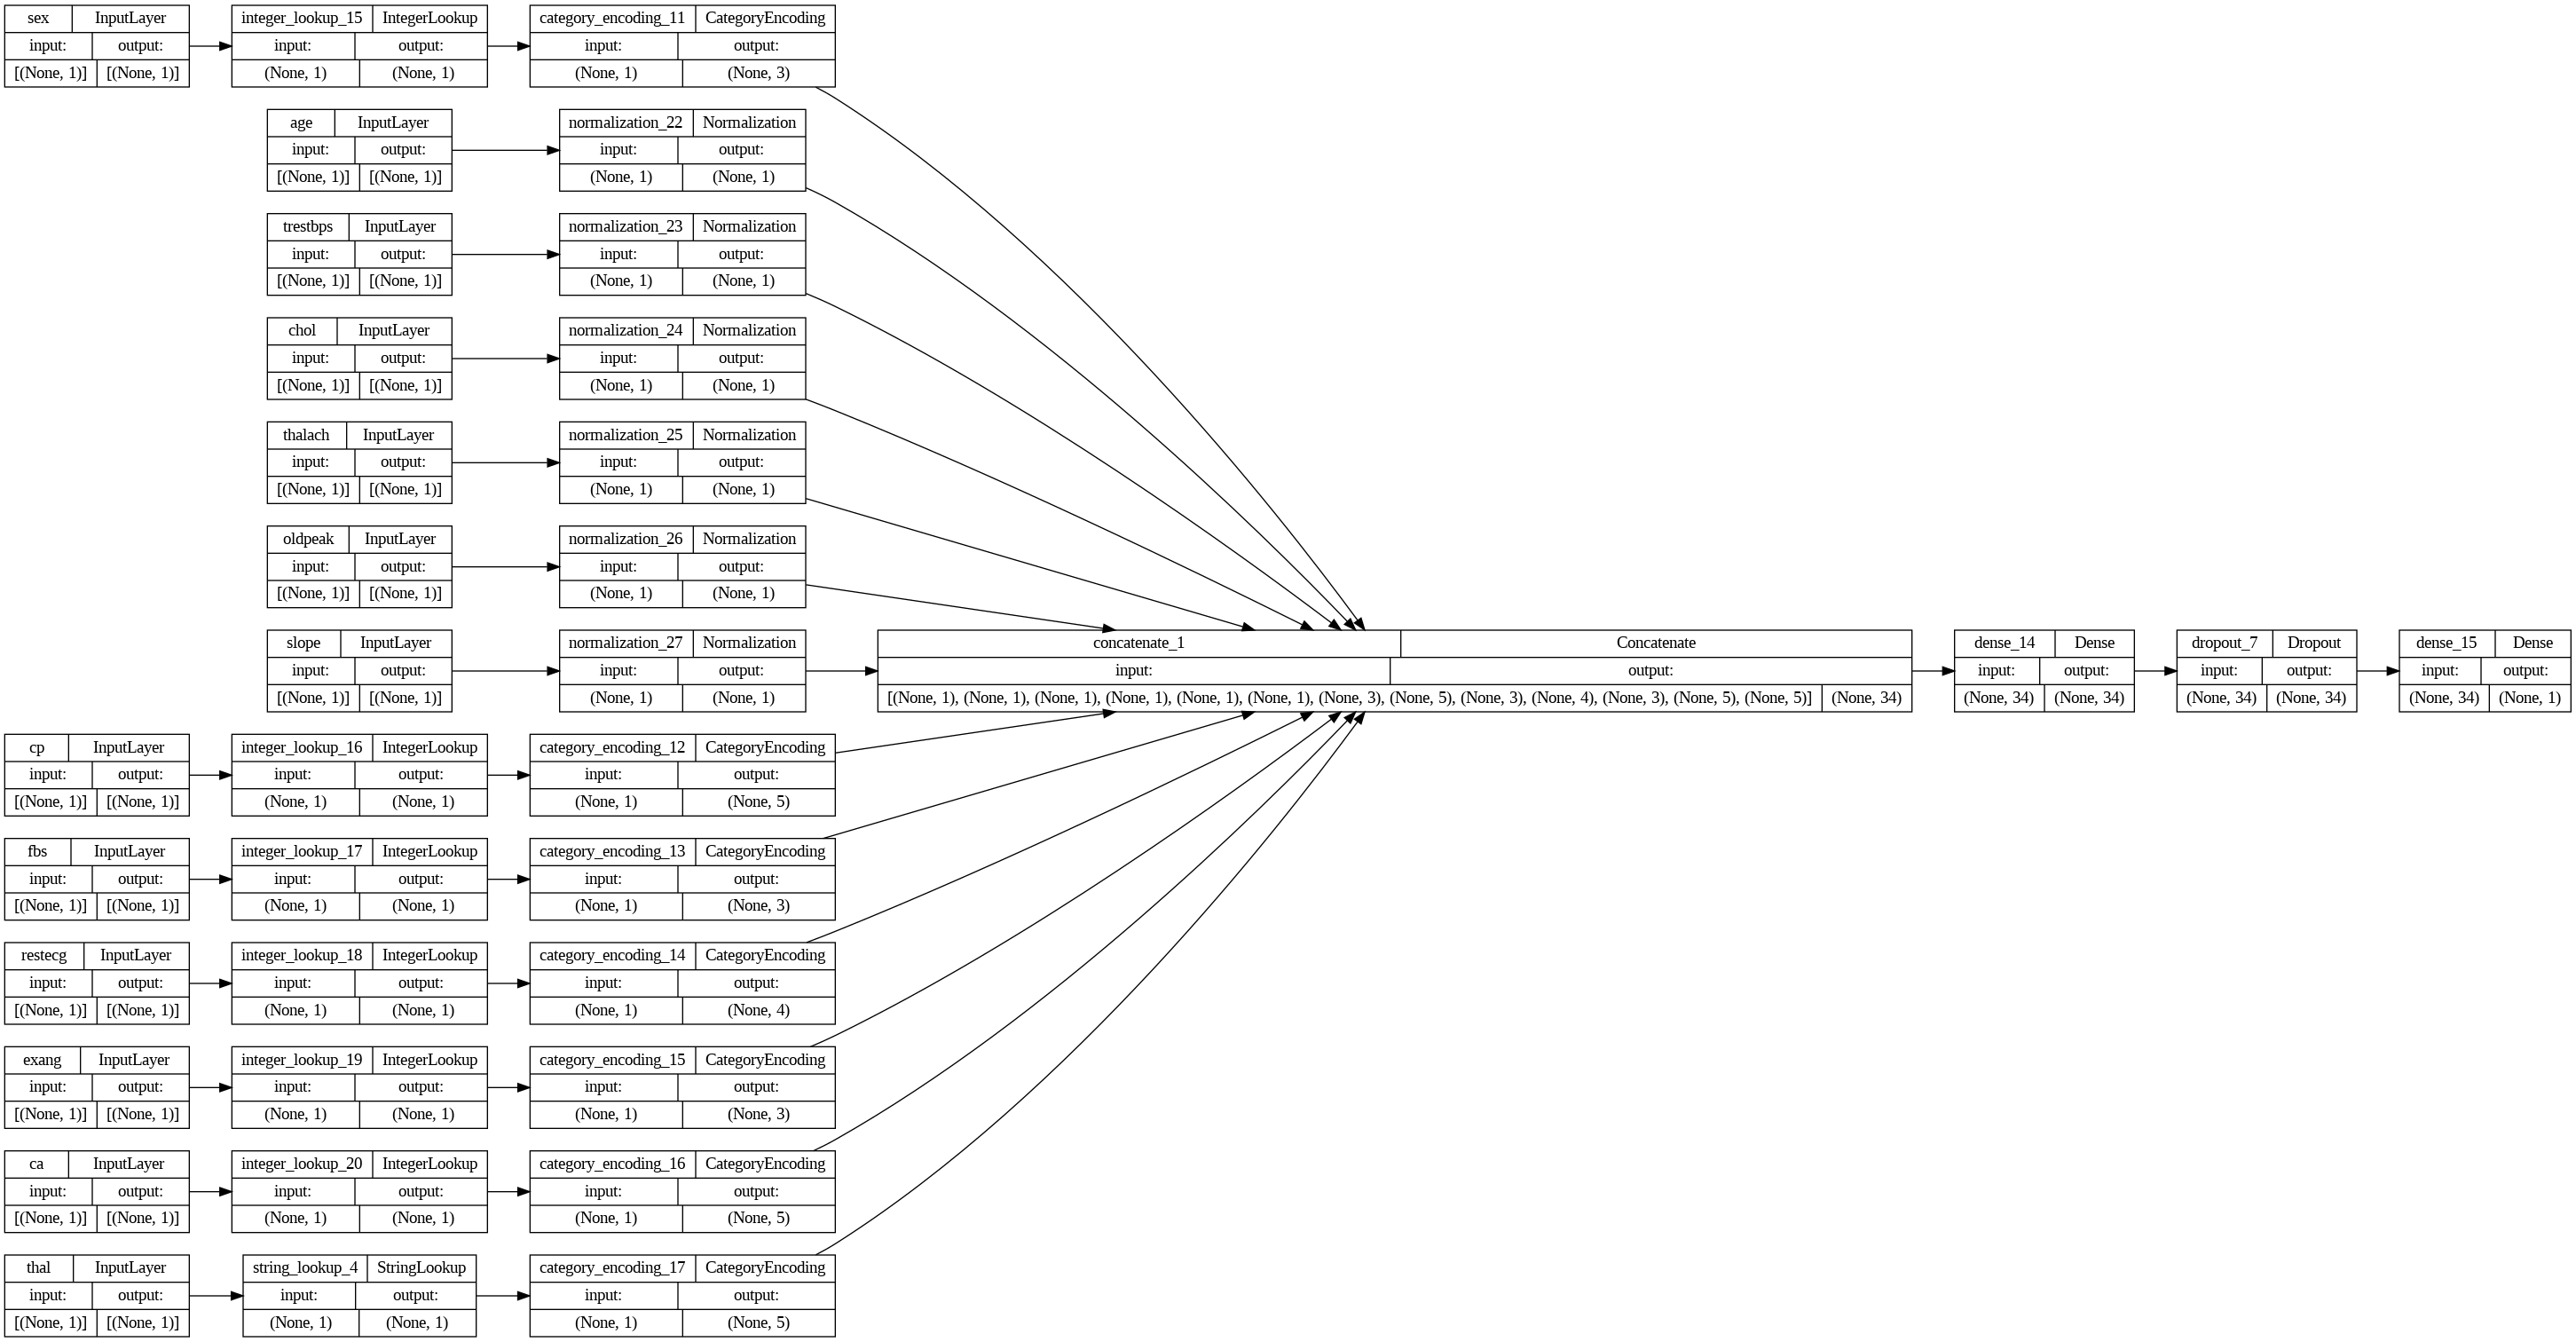

In [118]:
# `rankdir='LR'` is to make the graph horizontal.
## YOUR CODE HERE
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

### Train the model

(Change the Colab notebook's runtime to GPU for faster training)

In [119]:
## YOUR CODE HERE
model.fit(train_tf, epochs=10, validation_data=test_tf)
loss, accuracy = model.evaluate(test_tf)
print("Accuracy", accuracy)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.0495 - accuracy: 0.7107 - val_loss: 0.5838 - val_accuracy: 0.7869
Epoch 2/10
1/1 [==============================] - 0s 23ms/step - loss: 1.0007 - accuracy: 0.7107 - val_loss: 0.5267 - val_accuracy: 0.7869
Epoch 3/10
1/1 [==============================] - 0s 20ms/step - loss: 0.8544 - accuracy: 0.7107 - val_loss: 0.5169 - val_accuracy: 0.7869
Epoch 4/10
1/1 [==============================] - 0s 22ms/step - loss: 0.6446 - accuracy: 0.7107 - val_loss: 0.5116 - val_accuracy: 0.7869
Epoch 5/10
1/1 [==============================] - 0s 22ms/step - loss: 0.6563 - accuracy: 0.7107 - val_loss: 0.5078 - val_accuracy: 0.7869
Epoch 6/10
1/1 [==============================] - 0s 28ms/step - loss: 0.6125 - accuracy: 0.7107 - val_loss: 0.5057 - val_accuracy: 0.7869
Epoch 7/10
1/1 [==============================] - 0s 22ms/step - loss: 0.6468 - accuracy: 0.7107 - val_loss: 0.5037 - val_accuracy: 0.7869
Epoch 8/10
1/1 [=============

In [120]:
loss, accuracy = model.evaluate(test_tf)
print("Accuracy", accuracy)

1/1 [==============================] - 0s 11ms/step - loss: 0.5018 - accuracy: 0.7869
Accuracy 0.7868852615356445


## Inference on new data [1 Mark]

To get a prediction for a new sample, you can simply call `model.predict()`. There are
just two things you need to do:

1. wrap scalars into a list so as to have a batch dimension (models only process batches
of data, not single samples)
2. Call `convert_to_tensor` on each feature

Note : The predicted output should be either 0  or 1 based on a threshold value of probability 0.5.

In [121]:
model.save('heart_disease_classifier.keras')
reloaded_model = tf.keras.models.load_model('heart_disease_classifier.keras')


In [123]:
#age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	 || target
#67	  1	  4	  160	      286	    0	  2	    108	    1	    1.5	    2	    3	  normal || 1

sample = {
    'age': 67,
    'sex': 1,
    'cp': 4,
    'trestbps': 160,
    'chol': 280,
    'fbs': 0,
    'restecg': 2,
    'thalach': 108,
    'exang': 1,
    'oldpeak': 1.5,
    'slope': 2,
    'ca': 3,
    'thal': 'normal',
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = reloaded_model.predict(input_dict)
prob = predictions[0]

print(prob)

## YOUR CODE HERE

#input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
#predictions = model.predict(input_dict)

## YOUR CODE HERE

1/1 [==============================] - 0s 28ms/step
[0.24313834]
